In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from deprecated.Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline, ChipResonatorsTwoTlines, ChipResonatorsThreeTlines
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

In [3]:
epsilon_r = [11.9]
thickness_subs = [525e-6]
Lk = 100e-15

Feedline

In [4]:
FeedlineWidth = 20
FeedlineLength  = 4300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=Lk), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=Lk, length_CPW=(FeedlineLength + FeedlineTaperLength + BondpadLength)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.361087063625966 Ohm
Frequency of the feedline is 3.0082117882781736 GHz


# Chip

### Low Qc

Chip

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [5995. 5995. 5995. 5170. 4675. 4180.]
The frequencies are [np.float64(4.358094124574196), np.float64(4.93909704017939), np.float64(5.838424822407129), np.float64(6.287470933210665), np.float64(6.612383555246295), np.float64(6.993249111114949)]


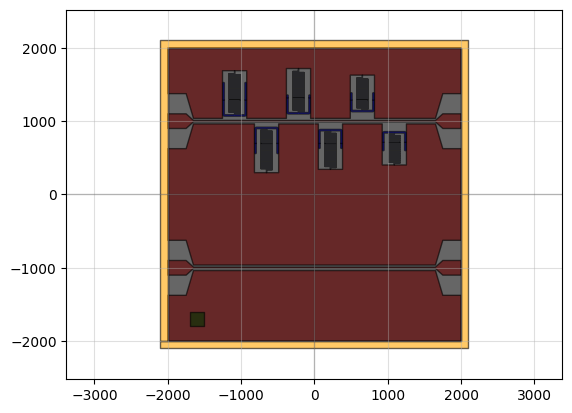

In [6]:
NumberOfResonators = int(6)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350,250, 250, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,35, 30,27, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*np.arange(30,106,15)
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

c, metal, chip = ChipResonatorsTwoTlines(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                        ypos_tlines = [1000, -1000], EdgeResDistanceFactor=0.33)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

# chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/20241216_SiRes-Al/si_al_6resonator_fab_twoTline-4x4.gds")
qp(chip)

MWO

In [10]:
import scipy.io as sc
import scipy.signal as sig

['lowQc-Lk.mat', 'lowQc.mat']
Low Qc: [5.1555     5.63946966 6.236864   6.707      7.2155706  7.55073   ]
Lk: [4.7322604 5.1773622 5.727424  6.1587374 6.6279126 6.934    ]


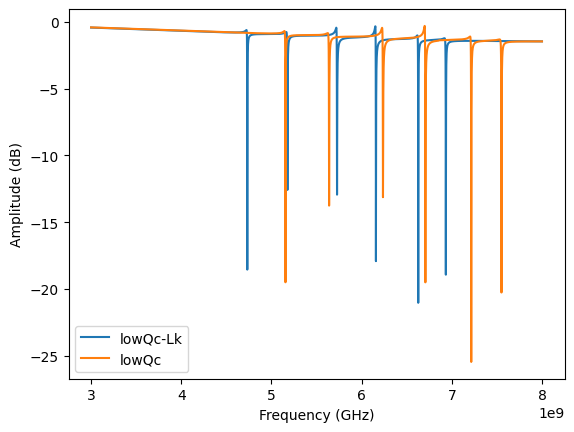

In [ ]:
path = r'C:\Users\localadmin\Documents\AWR_Projects\SiRes-Al'
file_list = os.listdir(path)
print(file_list[3:5])
d_low = {}

# Load the data
for file in file_list[3:5]:
    name = file.split('.')[0]
    file_path = os.path.join(path, file)
    mat_contents = sc.loadmat(file_path)
    freq = mat_contents['X\x00\x00\x00\x00\x00\x00\x00'][0]
    amp = mat_contents['Y\x00\x00\x00\x00\x00\x00\x00'][0]
    d_low[name] = {'freq': freq, 'amp': amp}


# Plot the data
peaks_low =[]
fig, ax = plt.subplots()
for key, val in d_low.items():
    ax.plot(val['freq'], val['amp'], label=key)
    peak = val['freq'][sig.find_peaks(-1*val['amp'], height=10)[0]]
    peaks_low.append(peak)
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Amplitude (dB)')

print(f'Low Qc: {peaks_low[1]*1e-9}')
print(f'Lk: {peaks_low[0]*1e-9}')

Cap sim


Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [5995. 5995. 5995. 5170. 4675. 4180.]
The frequencies are [np.float64(4.358094124574196), np.float64(4.93909704017939), np.float64(5.838424822407129), np.float64(6.287470933210665), np.float64(6.612383555246295), np.float64(6.993249111114949)]


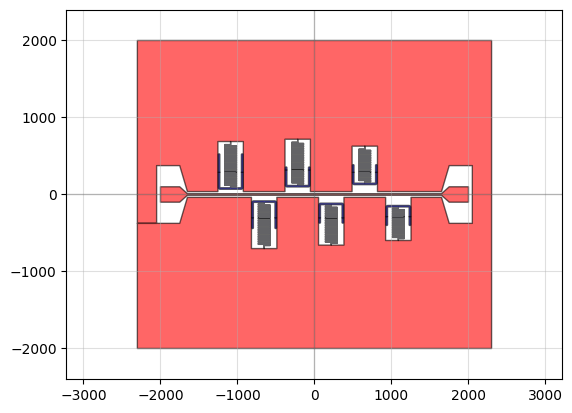

In [7]:
NumberOfResonators = int(6)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350,250, 250, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,35, 30,27, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*np.arange(30,106,15) 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = True,
                        EdgeResDistanceFactor=0.33)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

# chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/20241216_SiRes-Al/si_al_6resonator_fab_cap-sim-v2.gds")
qp(chip)

In [38]:
#Extracteed from ansys
C0 = 1e-15*np.array([205.81,183.1239,162.7407,155.964,147.715,145.538])
Cc = 1e-15*np.array([13.329,11.039,9.467,8.2907,7.4503,6.841])
# w = 2*np.pi*1e9*np.array([5.096,5.544,6.092,6.536,7.025,7.346])
w = 2*np.pi*peaks_low[1]
Qc = (C0+Cc)/(50*Cc**2*w)
print(Qc)


[ 761.55956248  899.32909948  980.6446547  1134.1153419  1233.18016535
 1372.6098927 ]


# High Qc

Chip

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [5995. 5995. 5995. 5170. 4675. 4180.]
The frequencies are [np.float64(4.358891166293393), np.float64(4.9400152746473065), np.float64(5.839679244263271), np.float64(6.28862442120331), np.float64(6.613444480905522), np.float64(6.994248892080738)]


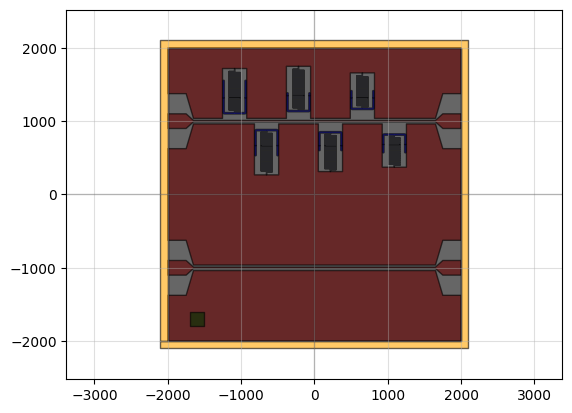

In [8]:
#Higher Qc
NumberOfResonators = int(6)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350,250, 250, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,35, 30,27, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*np.arange(60,136,15)
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

c, metal, chip = ChipResonatorsTwoTlines(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                        ypos_tlines = [1000, -1000], EdgeResDistanceFactor=0.33)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

# chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/20241216_SiRes-Al/si_al_6resonator_fab_twoTline-4x4-high-Qc.gds")
qp(chip)

MWO

['DATA_SETS', 'highQc-Lk.mat', 'highQc.mat', 'lowQc-Lk.mat', 'lowQc.mat', 'SingleToothResonator.emp', 'SingleToothResonator.vin', 'SiRes-Al - changing_ind_length.emp', 'SiRes-Al - changing_ind_length.vin', 'SiRes-Al - changing_vertical_length - Copy.emp', 'SiRes-Al - changing_vertical_length.emp', 'SiRes-Al - changing_vertical_length.vin', 'SiRes-Al - Copy.emp', 'SiRes-Al - Copy.vin', 'SiRes-Al - julian.vin', 'SiRes-Al -tenresonators_variableverticalcaplength.emp', 'SiRes-Al -tenresonators_variableverticalcaplength.vin', 'SiRes-Al.emp', 'SiRes-Al.vin', 'SiRes-Al_4resonators.emp', 'SiRes-Al_4resonators.vin', 'SiRes-zigzagresonator.emp', 'TEMP']
High Qc: [5.17591056 5.66322    6.25874364 6.7289616  7.22991276 7.5631898 ]
Lk: [4.75083    5.19896046 5.74703586 6.17781288 6.64038    6.94536   ]


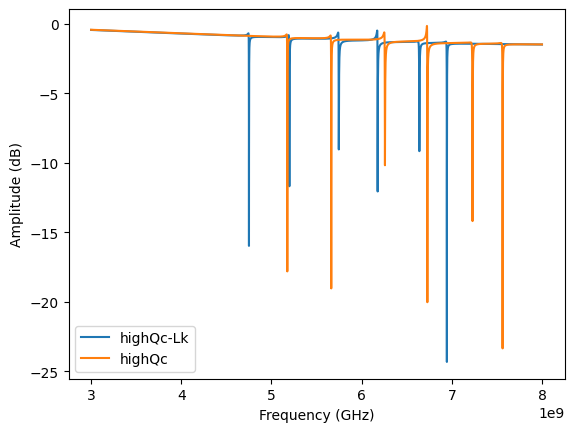

In [37]:
path = r'C:\Users\localadmin\Documents\AWR_Projects\SiRes-Al'
file_list = os.listdir(path)
print(file_list)
d_high = {}

# Load the data
for file in file_list[1:3]:
    name = file.split('.')[0]
    file_path = os.path.join(path, file)
    mat_contents = sc.loadmat(file_path)
    freq = mat_contents['X\x00\x00\x00\x00\x00\x00\x00'][0]
    amp = mat_contents['Y\x00\x00\x00\x00\x00\x00\x00'][0]
    d_high[name] = {'freq': freq, 'amp': amp}


# Plot the data
peaks_high =[]
fig, ax = plt.subplots()
for key, val in d_high.items():
    ax.plot(val['freq'], val['amp'], label=key)
    peak = val['freq'][sig.find_peaks(-1*val['amp'], height=5)[0]]
    peaks_high.append(peak)
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Amplitude (dB)')

print(f'High Qc: {peaks_high[1]*1e-9}')
print(f'Lk: {peaks_high[0]*1e-9}')

Cap sim

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [5995. 5995. 5995. 5170. 4675. 4180.]
The frequencies are [np.float64(4.358891166293393), np.float64(4.9400152746473065), np.float64(5.839679244263271), np.float64(6.28862442120331), np.float64(6.613444480905522), np.float64(6.994248892080738)]


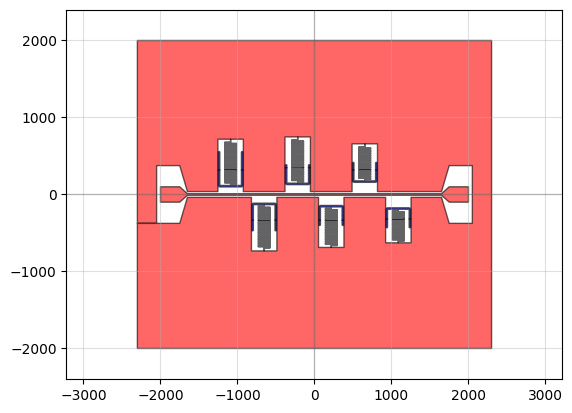

In [9]:
NumberOfResonators = int(6)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350,250, 250, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,35, 30,27, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*np.arange(60,136,15) 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = True,
                        EdgeResDistanceFactor=0.33)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/20241216_SiRes-Al/si_al_6resonator_fab_cap-sim-v2-highQc.gds")
qp(chip)

In [36]:
#Extracteed from ansys
C0_highQc = -1e-15*np.array([-206.87581689913,-185.027246996341,-163.899640485657,-156.538568090714,-149.103879301543,-146.194792640167])
Cc_highQc = -1e-15*np.array([-10.1501804616728,-8.58087650128685,-7.53240080291533,-6.68929789460476,-6.08163979717579,-5.66305202708305])
w_highQc = 2*np.pi*peaks_high[1]
Qc_highQc = (C0_highQc+Cc_highQc)/(50*Cc_highQc**2*w_highQc)
print(Qc_highQc)


[1295.4707079  1477.90652616 1536.69655856 1725.58082633 1847.25510428
 1992.88049477]
